In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device_name = tf.test.gpu_device_name()
print(device_name)


Bad key "text.kerning_factor" on line 4 in
C:\Users\yumin\.conda\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read the total Canadian confirmed data, generating initial
initial=pd.read_csv('C:/Users/yumin/Desktop/RNN confirmed/canada_confirmed.csv')
pd.DataFrame(initial,columns=range(0,100))
print(type(initial))
initial.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '2001/1/21',
       '2001/2/21', '2001/3/21', '2001/4/21', '2001/5/21', '2001/6/21',
       ...
       '3/31/21', '2004/1/21', '2004/2/21', '2004/3/21', '2004/4/21',
       '2004/5/21', '2004/6/21', '2004/7/21', '2004/8/21', '2004/9/21'],
      dtype='object', length=103)

In [6]:
#Delete columns unrelated to this code, generating INITIAL_DROPCONLUMS
initial_dropconlums=initial.drop(['Province/State','Country/Region','Lat','Long'],axis=1)

In [22]:
#Change the INDEX in the INITIAL_DROPCONLUMS table to a number
initial_dropconlums.columns=range(0,initial_dropconlums.shape[1])
print(initial_dropconlums)

        0       1       2       3       4       5       6       7       8   \
0   100428  100428  104228  105535  106378  107501  108469  109652  110641   
1    51990   51990   51990   54201   54629   55254   56015   56632   56632   
2        0       0       0       0       0       0       0       0       0   
3       13      13      13      13      13      13      13      13      13   
4    24700   25026   25126   25244   25374   25541   25742   25963   26166   
5      601     611     618     635     662     693     717     735     765   
6      390     390     390     391     392     392     392     392     392   
7       24      24      24      24      24      24      24      24      24   
8     1486    1499    1499    1505    1508    1520    1524    1526    1529   
9      266     266     266     266     266     266     266     266     266   
10  187344  191035  195368  198929  202085  205283  208691  212962  216674   
11      94      94      94      96      97      97     102     1

In [23]:
#Change the cumulative confirmed data into new data every day and save it into a CSV file
import numpy as np
ay=np.zeros((initial_dropconlums.shape[1],initial_dropconlums.shape[0]))
for a in range(98):
    deffirence=initial_dropconlums[a+1]-initial_dropconlums[a]
    ay[a]=deffirence    
print(ay)  
ayT=ay.T
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv", ayT, delimiter=",")

[[   0.    0.    0. ...    0.  495.    0.]
 [3800.    0.    0. ...    0.  238.    0.]
 [1307. 2211.    0. ...    0.  284.    5.]
 ...
 [1429. 1293.    0. ...    0.  205.    0.]
 [1521. 1262.    0. ...    0.  372.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


In [24]:
#The data of Canadian provinces are added and stored in JS files and CSV files
canadadata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv')
print(canadadata.shape)
confirmed_data=pd.DataFrame(canadadata.sum(axis=0))
# print(confirmed_data)
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv", confirmed_data, delimiter=",")
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv')
confirmed_data.to_json('./covid_canada_daily.js')

(15, 99)


In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
class data_preprocessing:
    def __init__(self,train_data,date):
        self.train_data = train_data
        self.date = date
    def train_test_split_data(train_data,date):
        dates=list(date.columns)
        dates1=dates[4:]
        dates=np.array(dates1)
        train_data=train_data.values
        nsplit1 = int(0.6*train_data.shape[0])
        nsplit2 = int(0.8*train_data.shape[0])
        X_train = train_data[:nsplit1]
        X_test = train_data[nsplit1:nsplit2]
        X_valid= train_data[nsplit2:]
        test_start_date=dates[-7]
        print(test_start_date)
        day=[]
        for i in range(0,100):
          day.append(i+1)
        day=np.array(day)
        print(day)
        return X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid
    def traindata_MinMaxScaler():
        X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)   
        scaler=MinMaxScaler(feature_range = (0,1))
        training_set_scaled = scaler.fit_transform(X_train)
        test_set_scaled = scaler.fit_transform(X_test)
        valid_set_scaled = scaler.fit_transform(X_valid)
        
        return training_set_scaled,test_set_scaled,scaler,valid_set_scaled
    def create_y_train(self):
#         X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)
#         scaler = MinMaxScaler.fit(train_fit)
        
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
#         org_dataframe=training_set_scaled
#         training_set_scaled=scaler.fit_transform(org_dataframe.reshape(-1,1))
#         print(len(training_set_scaled))
        time_steps=10
        x_data=[]
        y_data=[]
        for i in range(time_steps,len(training_set_scaled)):
          x_data.append(training_set_scaled[i-time_steps:i,0])
          y_data.append(training_set_scaled[i,0])
        x_data=np.array(x_data)
        print("x_data_shape",x_data.shape)
        y_data=np.array(y_data)
        print("y_data_shape",y_data.shape)
        x_data=np.reshape(x_data,(x_data.shape[0],x_data.shape[1],1))
        y_data=np.reshape(y_data,(y_data.shape[0],1))
        print('Reshaped x_data shape' , x_data.shape)
        print('Reshaped y_data shape' , y_data.shape)
        print(x_data.shape[1])
        return x_data,y_data
    def create_y_test(self):
        time_steps=10
        x_test=[]
        y_test=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(test_set_scaled)):
          x_test.append(test_set_scaled[i-time_steps:i])
          y_test.append(training_set_scaled[i,0])

        x_test=np.array(x_test)
        y_test=np.array(y_test)
        y_test=np.reshape(y_test,(y_test.shape[0],1))
        return x_test,y_test
    def create_y_valid(self):
        time_steps=10
        x_valid=[]
        y_valid=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(valid_set_scaled)):
          x_valid.append(valid_set_scaled[i-time_steps:i])
          y_valid.append(valid_set_scaled[i,0])

        x_valid=np.array(x_valid)
        y_valid=np.array(y_valid)
        y_valid=np.reshape(y_valid,(y_valid.shape[0],1))
        return x_valid,y_valid



# X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
preprocessing=data_preprocessing(traindata,initial)
X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
# training_set_scaled,test_set_scaled=preprocessing.traindata_MinMaxScaler()
training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
x_data,y_data=preprocessing.create_y_train()
x_test,y_test=preprocessing.create_y_test()
x_valid,y_valid=preprocessing.create_y_valid()
data_preprocessing.train_test_split_data(traindata,initial)
# print(test_set_scaled)

2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  

(array([[12341.],
        [ 8751.],
        [ 6407.],
        [ 6959.],
        [ 7259.],
        [ 8054.],
        [ 7404.],
        [ 6472.],
        [ 7686.],
        [ 5489.],
        [ 6264.],
        [ 6480.],
        [ 6095.],
        [ 5642.],
        [ 5534.],
        [ 5946.],
        [ 4572.],
        [ 5032.],
        [ 5433.],
        [ 5184.],
        [ 4521.],
        [ 4216.],
        [ 4875.],
        [ 3675.],
        [ 3861.],
        [ 4345.],
        [ 4284.],
        [ 3727.],
        [ 3472.],
        [ 4147.],
        [ 2680.],
        [ 3008.],
        [ 3400.],
        [ 3740.],
        [ 2916.],
        [ 2856.],
        [ 3534.],
        [ 2488.],
        [ 2929.],
        [ 2826.],
        [ 2365.],
        [ 3492.],
        [ 1920.],
        [ 1512.],
        [ 3956.],
        [ 2284.],
        [ 3020.],
        [ 2758.],
        [ 2277.],
        [ 2079.],
        [ 3180.],
        [ 2946.],
        [ 2515.],
        [ 2748.],
        [ 2816.],
        [ 

In [9]:
print(y_data.shape)

(48, 1)


In [16]:
covid_19_RNN=tf.keras.models.Sequential()
#input layer

covid_19_RNN.add(tf.keras.layers.GRU(units=50,return_sequences=True,recurrent_dropout=0.2,input_shape=(x_data.shape[1],1)))
# covid_19_RNN.add(tf.keras.layers.Dropout(0.15))
#1st hidden layer
covid_19_RNN.add(tf.keras.layers.GRU(units=25,return_sequences=True,recurrent_dropout=0.2))
# covid_19_RNN.add(tf.keras.layers.Dropout(0.13))
#2nd hidden layer
covid_19_RNN.add(tf.keras.layers.GRU(units=15,return_sequences=True,recurrent_dropout=0.2))
# covid_19_RNN.add(tf.keras.layers.Dropout(0.1))
#3rd hidden layer
# covid_19_RNN.add(tf.keras.layers.GRU(units=50,return_sequences=True))
# covid_19_RNN.add(tf.keras.layers.Dropout(0.09))
#output layer
covid_19_RNN.add(tf.keras.layers.Dense(units=1))
covid_19_RNN.add(tf.keras.layers.Dense(units=1))
covid_19_RNN.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mse'])
covid_19_RNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 10, 50)            7950      
_________________________________________________________________
gru_4 (GRU)                  (None, 10, 25)            5775      
_________________________________________________________________
gru_5 (GRU)                  (None, 10, 15)            1890      
_________________________________________________________________
dense_2 (Dense)              (None, 10, 1)             16        
_________________________________________________________________
dense_3 (Dense)              (None, 10, 1)             2         
Total params: 15,633
Trainable params: 15,633
Non-trainable params: 0
_________________________________________________________________


Epoch 1/600
5/5 [==============================] - 1s 115ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0536 - val_mse: 0.0536
Epoch 2/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 3/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0509 - val_mse: 0.0509
Epoch 4/600
5/5 [==============================] - 0s 43ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 5/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 6/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 7/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 8/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0076 - mse: 0.0

5/5 [==============================] - 0s 16ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 126/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 127/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 128/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 129/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 130/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 131/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 132/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0027 - mse: 0.

5/5 [==============================] - 0s 18ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 250/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 251/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 252/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 253/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 254/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 255/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 256/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0027 - mse: 0.

5/5 [==============================] - 0s 17ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 374/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 375/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 376/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 377/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 378/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 379/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 380/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0023 - mse: 0.

5/5 [==============================] - 0s 15ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 498/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 499/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 500/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 501/600
5/5 [==============================] - 0s 16ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 502/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 503/600
5/5 [==============================] - 0s 15ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 504/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0023 - mse: 0.

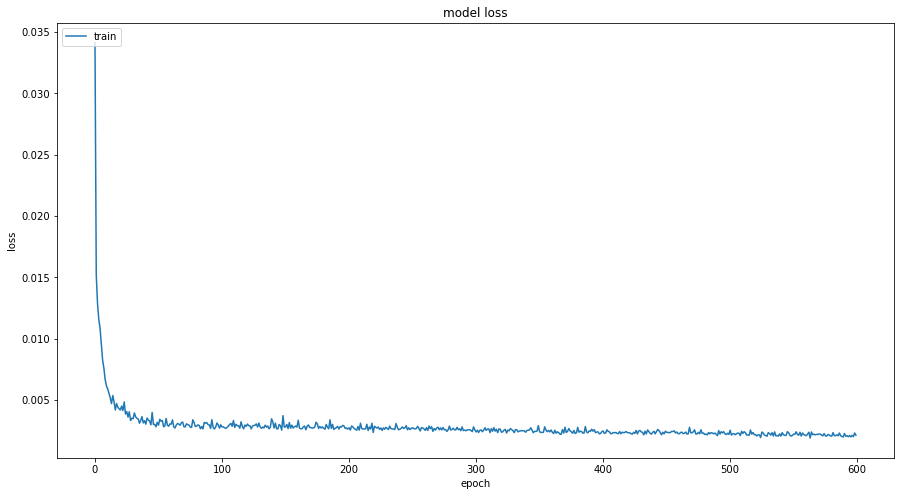

In [17]:

history_rnn=covid_19_RNN.fit(x_data,y_data,epochs=600,validation_data =(x_test,y_test),batch_size=10)

history_rnn
loss_history = history_rnn.history["loss"]
# testing_loss_history = history_rnn.history["val_loss"]
plt.figure(figsize=(15, 8))
plt.title('model loss')
plt.plot(history_rnn.history['loss'], label='train')
# plt.plot(history_rnn.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_mse.png')
plt.show()

In [18]:
score=covid_19_RNN.evaluate(x_valid,y_valid)
print('score is: test_loss %f, mae %f' % (score[0],score[1]))

1/1 [==============================] - 0s 1ms/step - loss: 0.0342 - mse: 0.0342
score is: test_loss 0.034202, mae 0.034202


In [33]:

predicted_covid_19_spread=covid_19_RNN.predict(x_valid)
# print(predicted_covid_19_spread)
predict_val=[]
# scaler = MinMaxScaler(feature_range = (0,1))
for i in range(0,predicted_covid_19_spread.shape[0]):
  print(predicted_covid_19_spread[i].mean())
  predict_val.append(predicted_covid_19_spread[i].mean())

predict_val=np.array(predict_val).reshape(-1,1)
predict=scaler.inverse_transform(predict_val)

print("The predicted perday spread from ",test_start_date,"is")
print(predict_val)



0.32742888
0.31108198
0.31746453
0.36103898
0.3888169
0.39078557
0.4137968
0.43724546
0.4101452
0.46884933
The predicted perday spread from  2004/3/21 is
[[0.32742888]
 [0.31108198]
 [0.31746453]
 [0.36103898]
 [0.3888169 ]
 [0.39078557]
 [0.4137968 ]
 [0.43724546]
 [0.4101452 ]
 [0.46884933]]


In [37]:

y_valid=np.array(y_valid).reshape(-1,1)
actual=scaler.inverse_transform(y_valid)
print(y_valid)


[[0.49688553]
 [0.37363423]
 [0.61145716]
 [0.35862351]
 [0.55498826]
 [1.        ]
 [0.61646074]
 [0.69508833]
 [0.7720821 ]
 [0.        ]]


MSE = 0.08404165758947256
R-Squared Score = -1.3598245371495228


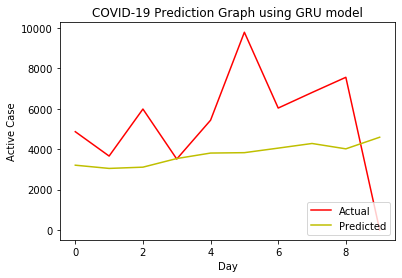

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import *
time_steps=10
def evaluate_model(model,time_steps):
    
    # Prediction Time !!!!
#     predict_val =model.predict(x_valid)
    mse = mean_squared_error(y_valid[:-1],predict_val[:-1])
#     rmse = sqrt(mse)
    r = r2_score(y_valid[:-1],predict_val[:-1])
    return mse,r, y_valid, predict
mse,r2_score,true,predicted = evaluate_model(covid_19_RNN,time_steps)
print('MSE = {}'.format(mse))
print('R-Squared Score = {}'.format(r2_score))



def plot_data(actual,predict):
    plt.plot(actual,c = 'r')
    plt.plot(predict,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Active Case')
    plt.title('COVID-19 Prediction Graph using GRU model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()
plot_data(actual,predict)